In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
data = pd.read_csv('HDFCBANK.csv')
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 0 to 4693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4687 non-null   datetime64[ns]
 1   Open    4687 non-null   float64       
 2   High    4687 non-null   float64       
 3   Low     4687 non-null   float64       
 4   Close   4687 non-null   float64       
 5   Volume  4687 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 256.3 KB


In [12]:
data.head(10)

,Date,Open,High,Low,Close,Volume
0,2005-01-03,51.605000,52.779999,51.605000,52.525002,1295580.0
1,2005-01-04,52.505001,53.099998,50.500000,51.945000,2238060.0
2,2005-01-05,52.000000,52.000000,48.700001,50.005001,3987870.0
3,2005-01-06,50.005001,50.980000,47.900002,48.514999,4829510.0
4,2005-01-07,48.799999,49.375000,48.450001,49.025002,2649000.0
5,2005-01-10,50.000000,50.799999,48.525002,48.974998,6612870.0
6,2005-01-11,49.000000,49.174999,48.000000,48.340000,2391110.0
7,2005-01-12,48.340000,48.689999,47.509998,48.095001,1418790.0
8,2005-01-13,48.000000,50.799999,48.000000,49.889999,5395920.0
9,2005-01-14,49.900002,52.200001,49.224998,51.494999,7951920.0


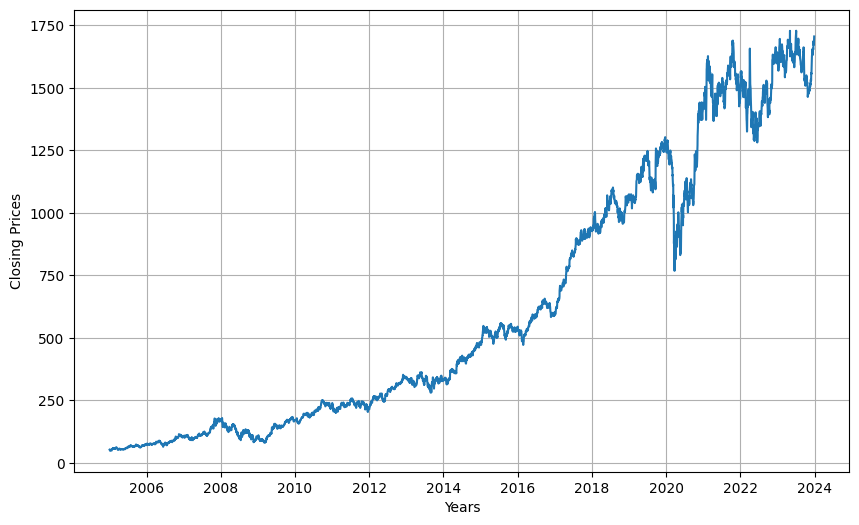

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data['Date'],data['Close'])
plt.show()

In [14]:
len(data)

4687

In [16]:
row = int(len(data)*0.9)
train_data = list(data[:row]['Close'])
test_data = list(data[row:]['Close'])
print(train_data[:10] ,len(train_data))
print(test_data[:10], len(test_data))

[52.525002, 51.945, 50.005001, 48.514999, 49.025002, 48.974998, 48.34, 48.095001, 49.889999, 51.494999] 4218
[1524.0, 1468.150024, 1461.849976, 1497.599976, 1525.099976, 1518.849976, 1473.699951, 1517.800049, 1515.75, 1506.5] 469


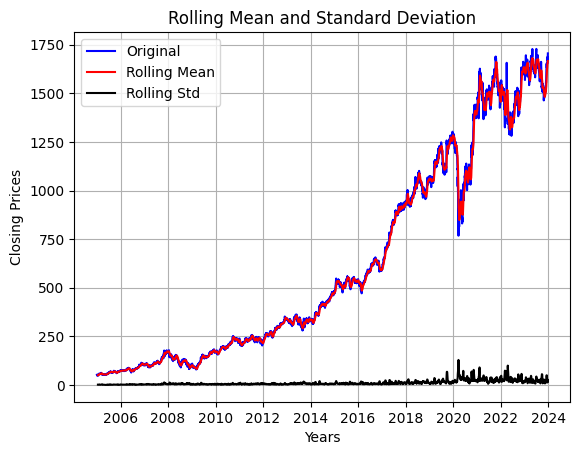

Results of dickey fuller test
Test Statistics                   0.460552
p-value                           0.983623
No. of lags used                 31.000000
Number of observations used    4655.000000
critical value (1%)              -3.431756
critical value (5%)              -2.862161
critical value (10%)             -2.567101
dtype: float64


In [17]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    date = data[:].Date
    plt.grid(True)
    plt.xlabel('Years')
    plt.ylabel('Closing Prices')
    plt.plot(date,timeseries, color='blue',label='Original')
    plt.plot(date,rolmean, color='red', label='Rolling Mean')
    plt.plot(date,rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data['Close'])

In [18]:
returns = data['Close'].pct_change().dropna()
returns

1      -0.011042
2      -0.037347
3      -0.029797
4       0.010512
5      -0.001020
          ...   
4689    0.017924
4690   -0.009397
4691    0.006943
4692    0.012393
4693    0.001145
Name: Close, Length: 4686, dtype: float64

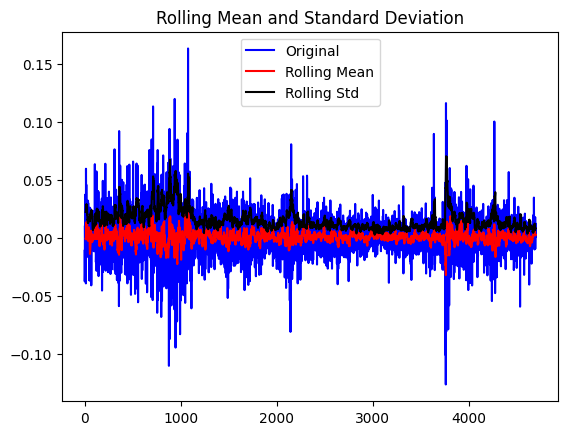

Results of dickey fuller test
Test Statistics                 -30.850918
p-value                           0.000000
No. of lags used                  5.000000
Number of observations used    4680.000000
critical value (1%)              -3.431748
critical value (5%)              -2.862158
critical value (10%)             -2.567099
dtype: float64


In [19]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(returns)



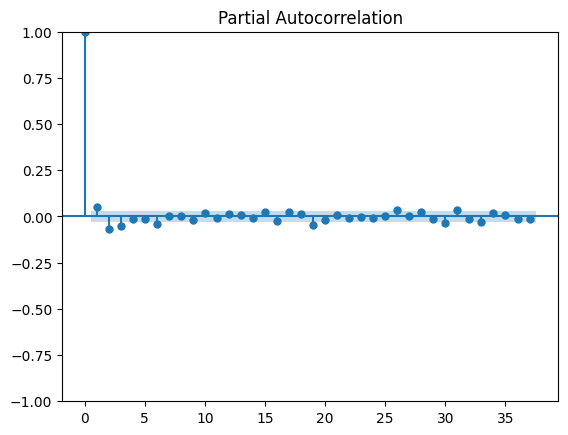

In [20]:
plot_pacf(returns, method = 'ywm')
plt.show()

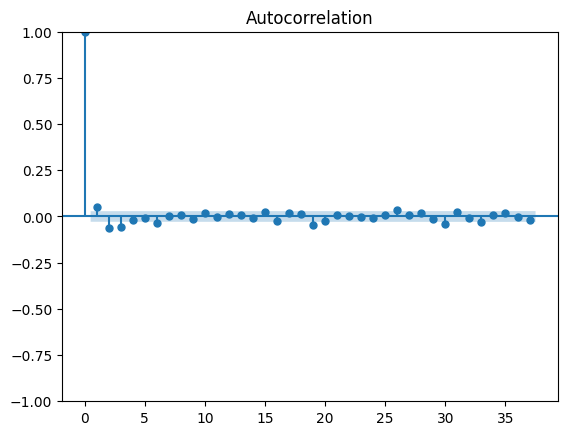

In [21]:
plot_acf(returns)
plt.show()

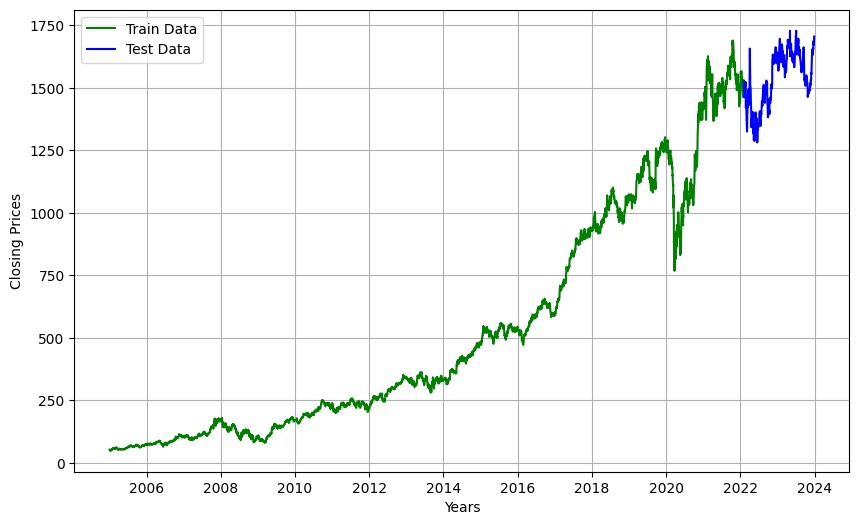

In [22]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data[0:row]['Date'],data[0:row]['Close'], 'green', label='Train Data')
plt.plot(data[row:]['Date'],data[row:]['Close'], 'blue', label='Test Data')
plt.legend()

In [23]:
model_predictions = []
n_test_obser = len(test_data)
print(train_data[:10])
print(test_data[:10])

[52.525002, 51.945, 50.005001, 48.514999, 49.025002, 48.974998, 48.34, 48.095001, 49.889999, 51.494999]
[1524.0, 1468.150024, 1461.849976, 1497.599976, 1525.099976, 1518.849976, 1473.699951, 1517.800049, 1515.75, 1506.5]


In [24]:
import warnings
warnings.filterwarnings('ignore')
for i in range(n_test_obser):
    model = ARIMA(train_data, order=(2, 1, 2))  #p,d,q
    
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output)
    model_predictions.append(output)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

[1514.28478179]
[1523.40567288]
[1468.43221339]
[1464.03923527]
[1500.81330424]
[1522.44445481]
[1514.4308273]
[1473.15146303]
[1518.55541472]
[1516.78143064]
[1504.44987231]
[1509.97327219]
[1523.79398987]
[1512.50759723]
[1500.47862746]
[1418.66212004]
[1458.17776667]
[1426.11146909]
[1368.39854846]
[1373.3173161]
[1367.47416251]
[1325.29587782]
[1324.47068157]
[1369.65500262]
[1393.67587788]
[1395.58070155]
[1441.12902953]
[1423.18135164]
[1449.29167388]
[1482.03960371]
[1484.99811518]
[1492.91098772]
[1479.94315495]
[1443.39400003]
[1432.85596573]
[1433.82423054]
[1451.35001273]
[1476.1253663]
[1468.5830557]
[1508.37399403]
[1662.79712059]
[1594.51922545]
[1549.91088353]
[1528.61741299]
[1518.84683495]
[1489.28832395]
[1492.80599409]
[1467.67069433]
[1395.26685977]
[1344.01632184]
[1359.81387811]
[1373.54707509]
[1347.8563998]
[1376.20627864]
[1373.72888281]
[1362.04161072]
[1374.56531636]
[1392.78832942]
[1398.22174222]
[1352.55365497]
[1363.81912035]
[1316.31662026]
[1311.7102723

In [25]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4686
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -18164.381
Date:                Tue, 21 May 2024   AIC                          36338.761
Time:                        00:50:16   BIC                          36371.022
Sample:                             0   HQIC                         36350.105
                               - 4686                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4828      0.012    -40.942      0.000      -0.506      -0.460
ar.L2         -0.9331      0.010    -90.874      0.000      -0.953      -0.913
ma.L1          0.5168      0.013     40.810      0.0

In [26]:
len(model_predictions)

469

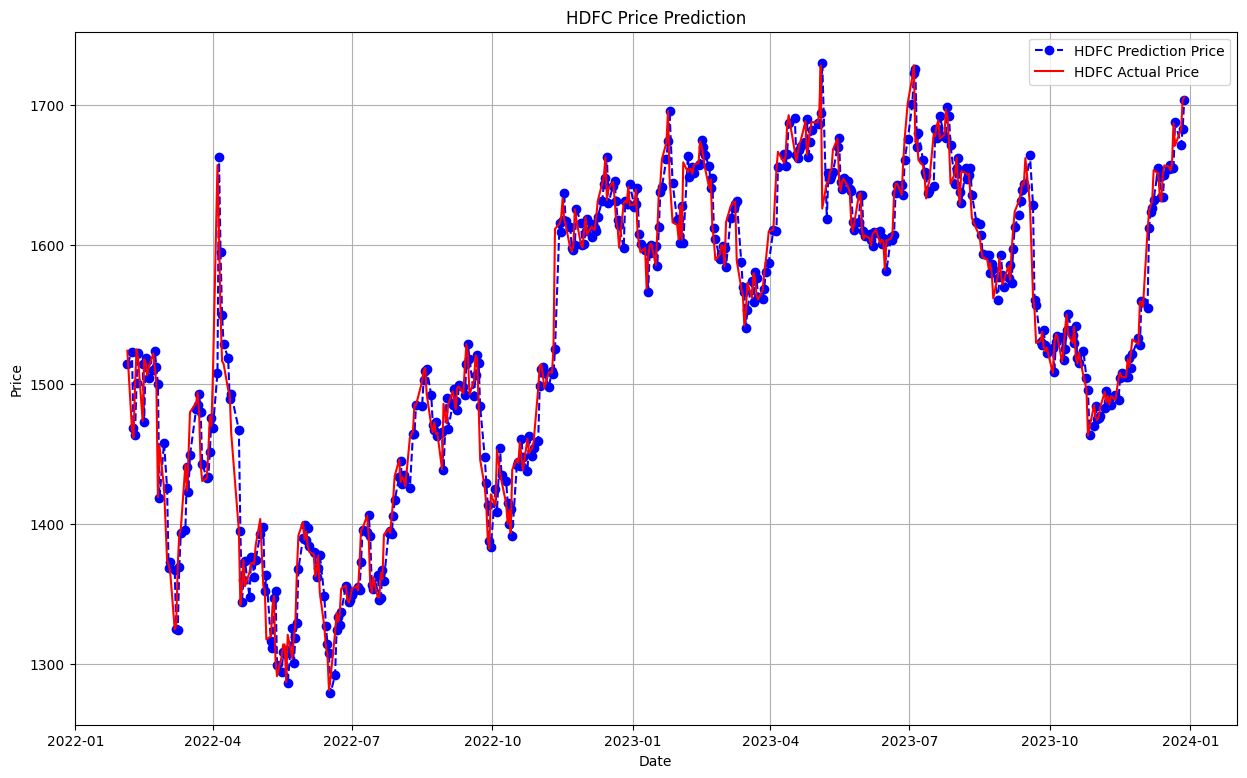

In [27]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = data[row:].Date
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'HDFC Prediction Price')
plt.plot(date_range, test_data, color = 'red', label = 'HDFC Actual Price')

plt.title('HDFC Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [28]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: ',(mape))
print('Accuracy: ', (100-(mape*100)))

MAPE:  0.0833156260155292
Accuracy:  91.66843739844708
